In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import datasets, tree, model_selection, ensemble, metrics, linear_model

In [2]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [3]:
def L_derivative(y, z):
    return y - z

In [4]:
DT_regressors = []
reg_coefs = []
n_trees = 50

def gbm_predict(X):
    """Вычиляет прогноз построенной на данный момент композиции деревьев на выборке X"""
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(DT_regressors, reg_coefs)]) for x in X]

In [5]:
for i in range(n_trees-1):
    if (i == 0):
        regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        regressor.fit(X_train, y_train)
        z = gbm_predict(X_train)
        DT_regressors.append(regressor)
        reg_coefs.append(0.9)
    else:
        regressor = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
        z = gbm_predict(X_train)
        regressor.fit(X_train, L_derivative(y_train, z))
        DT_regressors.append(regressor)
        reg_coefs.append(0.9 / (1.0 + i + 1))

In [6]:
np.sqrt(metrics.mean_squared_error(y_test, gbm_predict(X_test)))

5.4129632788232085

In [7]:
LR_regressor = linear_model.LinearRegression()
LR_regressor.fit(X_train, y_train)
np.sqrt(metrics.mean_squared_error(y_test, LR_regressor.predict(X_test)))

5.548418091503351

Text(0.5, 0, 'number of estimators')

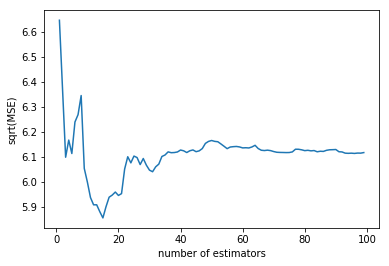

In [25]:
sqrt_mses = []
n_estimators = np.arange(1, 100)

for num in n_estimators:
    xgb_regressor = xgb.XGBRegressor(learning_rate=1, n_estimators = num)
    xgb_regressor.fit(X_train,y_train)
    preds = xgb_regressor.predict(X_test)
    sqrt_mse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    sqrt_mses.append(sqrt_mse)

plt.plot(n_estimators, sqrt_mses)
plt.ylabel("sqrt(MSE)")
plt.xlabel("number of estimators")

Text(0.5, 0, 'max_depth')

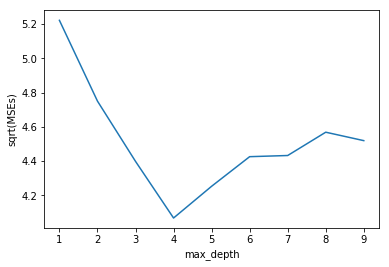

In [23]:
sqrt_mses = []
max_depths = np.arange(1, 10)

for max_depth in max_depths:
    xgb_regressor = xgb.XGBRegressor(max_depth=max_depth)
    xgb_regressor.fit(X_train,y_train)
    preds = xgb_regressor.predict(X_test)
    sqrt_mse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    sqrt_mses.append(sqrt_mse)

plt.plot(max_depths, sqrt_mses)
plt.ylabel("sqrt(MSEs)")
plt.xlabel("max_depth")

Text(0.5, 0, 'learning_rate')

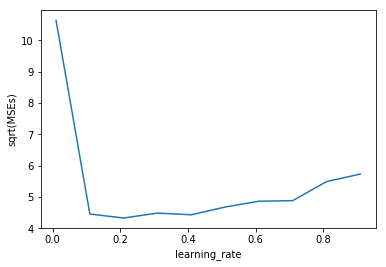

In [24]:
sqrt_mses = []
learning_rates = np.arange(0.01, 1, 0.1)

for rate in learning_rates:
    xgb_regressor = xgb.XGBRegressor(learning_rate=rate)
    xgb_regressor.fit(X_train,y_train)
    preds = xgb_regressor.predict(X_test)
    sqrt_mse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    sqrt_mses.append(sqrt_mse)

plt.plot(learning_rates, sqrt_mses)
plt.ylabel("sqrt(MSEs)")
plt.xlabel("learning_rate")